In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('RUvideos.csv')

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
cols = ['trending_date','channel_title', 'category_id',
       'comments_disabled', 'ratings_disabled',
       'video_error_or_removed']
for col in cols:
    print('='*20 + col + '='*20)
    print(df[col].value_counts())

====================trending_date====================
17.01.12    200
18.25.04    200
18.28.01    200
18.10.02    200
18.21.02    200
18.01.01    200
18.14.04    200
17.20.11    200
18.04.04    200
17.14.12    200
18.27.04    200
18.25.03    200
18.26.04    200
18.05.05    200
18.17.01    200
18.25.05    200
18.18.04    200
17.11.12    200
18.04.05    200
18.11.03    200
18.16.05    200
18.27.05    200
18.11.02    200
18.22.03    200
17.27.12    200
18.01.06    200
18.16.01    200
18.18.02    200
18.20.05    200
18.23.03    200
           ... 
18.15.03    199
18.27.03    199
18.29.01    199
18.28.02    199
18.15.02    199
18.08.03    199
18.18.03    199
18.07.02    199
18.15.05    199
18.07.03    199
18.20.03    199
18.26.02    199
18.23.02    199
18.06.02    199
18.19.03    199
18.03.03    199
18.13.03    199
18.22.02    199
18.05.02    199
18.14.02    199
18.14.03    198
18.16.03    198
18.27.02    198
18.17.03    198
18.12.02    198
18.01.02    197
18.31.01    197
18.02.02    196
18

In [9]:
cols = ['views', 'likes', 'dislikes', 'comment_count']
for col in cols:
    print('='*20 + col + '='*20)
    print('最大值', df[col].max())
    print('最小值', df[col].min())
    print('均值', df[col].mean())
    print('中位数', df[col].median())
    print('四分位数','1/4:',df[col].quantile(0.25),'3/4:',df[col].quantile(0.75))
    print('缺失值个数', len(df[col]) - df[col].count())

====================views====================
最大值 225211923
最小值 549
均值 2360784.6382573447
中位数 681861.0
四分位数 1/4: 242329.0 3/4: 1823157.0
缺失值个数 0
====================likes====================
最大值 5613827
最小值 0
均值 74266.7024347359
中位数 18091.0
四分位数 1/4: 5424.0 3/4: 55417.0
缺失值个数 0
====================dislikes====================
最大值 1674420
最小值 0
均值 3711.400888910596
中位数 631.0
四分位数 1/4: 202.0 3/4: 1938.0
缺失值个数 0
====================comment_count====================
最大值 1361580
最小值 0
均值 8446.803682629612
中位数 1856.0
四分位数 1/4: 614.0 3/4: 5755.0
缺失值个数 0


====================views====================


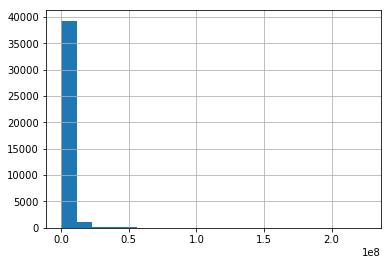

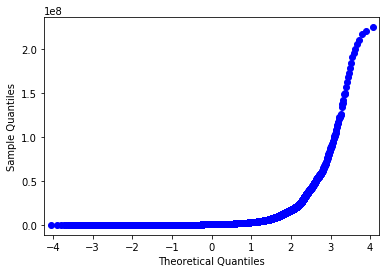

====================likes====================


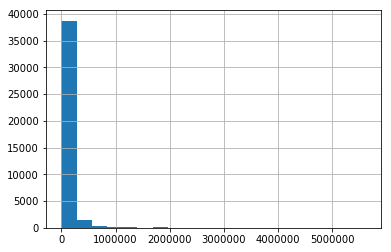

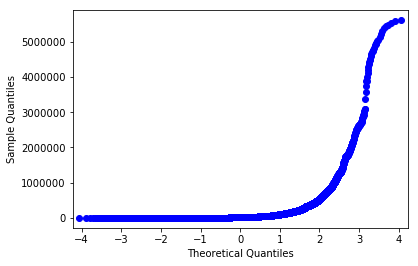

====================dislikes====================


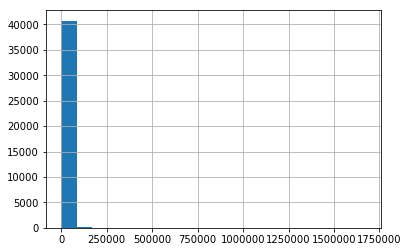

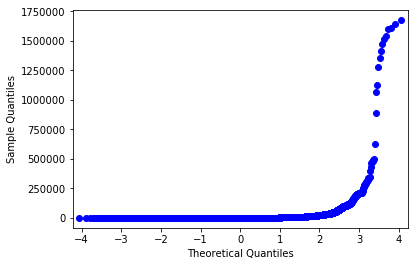

====================comment_count====================


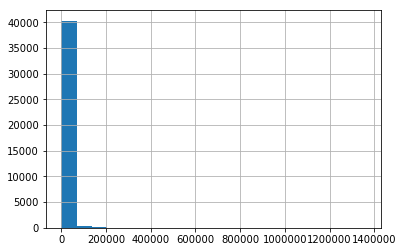

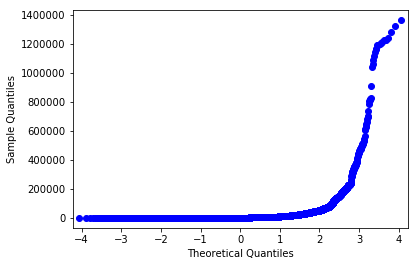

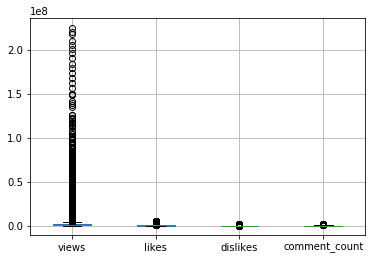

In [23]:
# 绘制直方图
# 用qq图检验其分布是否为正态分布
from pandas.core import datetools
import pylab 
import statsmodels.api as sm
import scipy.stats as stats
cols = ['views', 'likes', 'dislikes', 'comment_count']
for col in cols:
    print('='*20 + col + '='*20)
    df[col].hist(bins=20)
    sm.qqplot(df[col])
    pylab.show()
# 绘制盒图
df.boxplot(column=cols)

In [15]:
cols = df.columns
for col in cols:
    print(col,'缺失量',len(df[col]) - df[col].count(), '缺失占比(%)',round((len(df[col]) - df[col].count()) / len(df[col]) * 100,5))

video_id 缺失量 0 缺失占比(%) 0.0
trending_date 缺失量 0 缺失占比(%) 0.0
title 缺失量 0 缺失占比(%) 0.0
channel_title 缺失量 0 缺失占比(%) 0.0
category_id 缺失量 0 缺失占比(%) 0.0
publish_time 缺失量 0 缺失占比(%) 0.0
tags 缺失量 0 缺失占比(%) 0.0
views 缺失量 0 缺失占比(%) 0.0
likes 缺失量 0 缺失占比(%) 0.0
dislikes 缺失量 0 缺失占比(%) 0.0
comment_count 缺失量 0 缺失占比(%) 0.0
thumbnail_link 缺失量 0 缺失占比(%) 0.0
comments_disabled 缺失量 0 缺失占比(%) 0.0
ratings_disabled 缺失量 0 缺失占比(%) 0.0
video_error_or_removed 缺失量 0 缺失占比(%) 0.0
description 缺失量 570 缺失占比(%) 1.39198
